In [9]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [11]:
accesscm2_pr_file = "data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc"

In [12]:
dset = xr.open_dataset(accesscm2_pr_file)

In [29]:
dset

<xarray.Dataset>
Dimensions:    (time: 60, bnds: 2, lon: 192, lat: 144)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    pr         (time, lat, lon) float32 1.234e-06 1.226e-06 ... 4.08e-06
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b4dd0f13-6073-4d10-b4e6-7d7a4401e37d
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...
    history:                Tue Jan 12 14:50:25 2021: ncatted -O -a history,p...
    NCO:                    netCDF Operators version 4.9.2 (Homepage = http:/...

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (time: 60, bnds: 2, lon: 192, lat: 144)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
  

In [63]:
clim = dset['pr'].mean("time", keep_attrs = True)
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

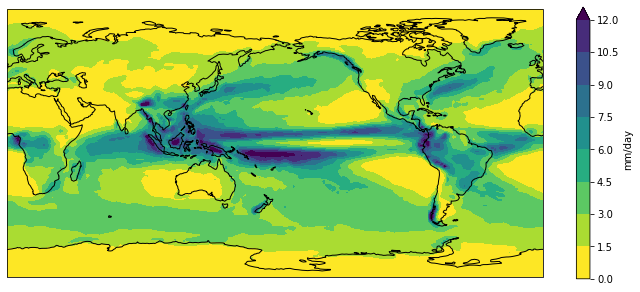

In [38]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap='viridis_r')
ax.coastlines()
plt.show()

In [39]:
import cmocean as cmo

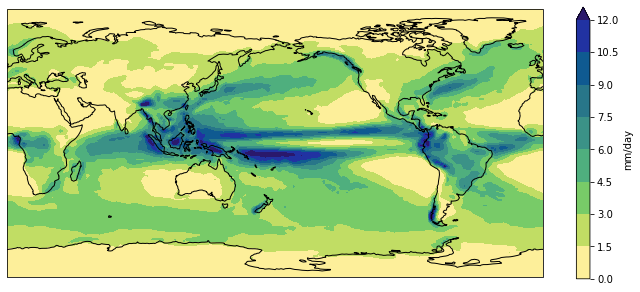

In [40]:
fig = plt.figure(figsize = [12,5])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude = 180))
clim.plot.contourf(ax = ax,
                   levels = np.arange(0, 13.5, 1.5),
                   extend = 'max',
                   transform = ccrs.PlateCarree(),
                   cbar_kwargs = {'label': clim.units},
                   cmap = cmo.cm.haline_r)
ax.coastlines()
plt.show()

Compute only **JJA** climatology. 

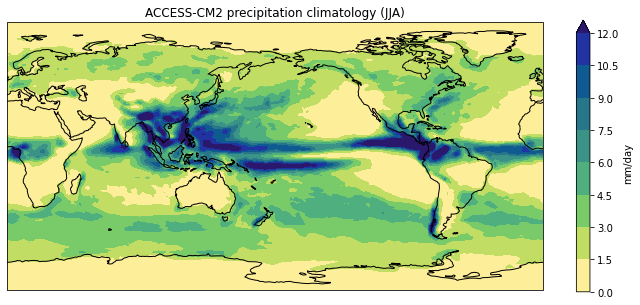

In [76]:
fig = plt.figure(figsize = [12,5])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude = 180))

jjamean = dset["pr"] \
    .groupby("time.season") \
    .mean("time", keep_attrs = True) \
    .sel(season = "JJA") 
    
jjamean.data = jjamean.data * 86400   

jjamean.attrs['units'] = 'mm/day'
    
jjamean.plot.contourf(ax = ax,
                   levels = np.arange(0, 13.5, 1.5),
                   extend = 'max',
                   transform = ccrs.PlateCarree(),
                   cbar_kwargs = {'label': clim.units},
                   cmap = cmo.cm.haline_r)

model = dset.attrs['source_id']
title = f'{model} precipitation climatology (JJA)'
plt.title(title)

ax.coastlines()
plt.show()

 Let's wrap all this nonsense into a couple of functions.

In [119]:
def convert_units(data, m = 86400, add = 0, unit = "Undefined unit"):
    data = data * m
    data.attrs["units"] = unit
    return data

def compute_mean(data, season):
     data = data \
        .groupby("time.season") \
        .mean("time", keep_attrs = True) \
        .sel(season = season) 
        
     return data

def make_plot(data, season, model):
    fig = plt.figure(figsize = [12,5])
    ax = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude = 180))
    
    data.plot.contourf(ax = ax,
                   levels = np.arange(0, 13.5, 1.5),
                   extend = 'max',
                   transform = ccrs.PlateCarree(),
                   cbar_kwargs = {'label': clim.units},
                   cmap = cmo.cm.haline_r)
    
    title = f'{model} precipitation climatology ({season})'
    plt.title(title)

    ax.coastlines()
    plt.show()
    
def plot_seasonal_mean(file, season, variable = "pr"):
    data = xr.open_dataset(file)
    model = data.attrs['source_id']
    
    data = data[variable]
    data = convert_units(data, unit = "mm/day")
    data = compute_mean(data, season)
    
    make_plot(data, season, model)
    
    


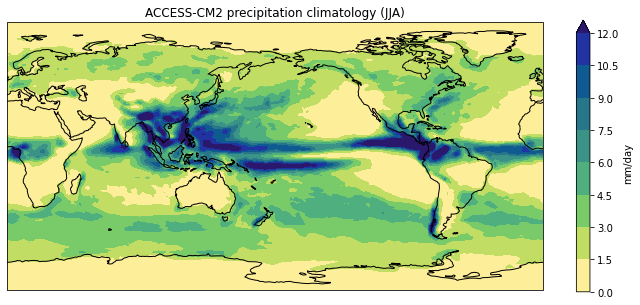

In [120]:
plot_seasonal_mean(accesscm2_pr_file, "JJA")